In [53]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv


In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df = pd.read_csv("/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
df.describe

<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

In [58]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [59]:
df.isnull().sum().sum()

0

In [60]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [61]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.head(),df.tail()

(   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619    France  Female   42       2       0.00              1   
 1          608     Spain  Female   41       1   83807.86              1   
 2          502    France  Female   42       8  159660.80              3   
 3          699    France  Female   39       1       0.00              2   
 4          850     Spain  Female   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  Exited  
 0          1               1        101348.88       1  
 1          0               1        112542.58       0  
 2          1               0        113931.57       1  
 3          0               0         93826.63       0  
 4          1               1         79084.10       0  ,
       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 9995          771    France    Male   39       5       0.00              2   
 9996          516    France    Male   35

In [63]:
y=df[df['Exited']==1]
x=df[df['Exited']==0]

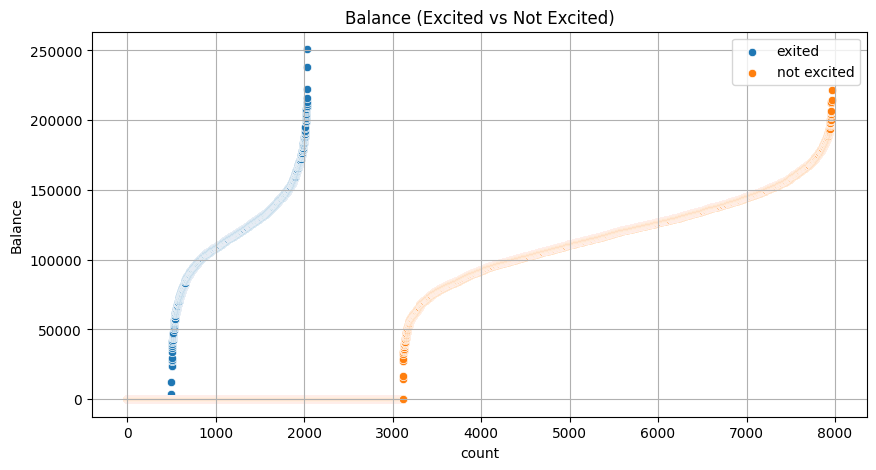

In [64]:
plt.figure(figsize=(10,5))
ybalance=list(y['Balance'])
sbalance=list(x["Balance"])

ybalance.sort()
sbalance.sort()

sns.scatterplot(ybalance,label="exited")
sns.scatterplot(sbalance,label="not excited")
plt.grid()
plt.title("Balance (Excited vs Not Excited)")
plt.ylabel("Balance")
plt.xlabel("count")
plt.show()

In [65]:
Geography_dummies=pd.get_dummies(df,columns=['Geography'])
Gender_dummies=Geography_dummies.replace(to_replace={'Gender' : {'Female':1, 'Male':0}})

In [66]:
df_encoded = Gender_dummies
df_encoded.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


<function matplotlib.pyplot.show(close=None, block=None)>

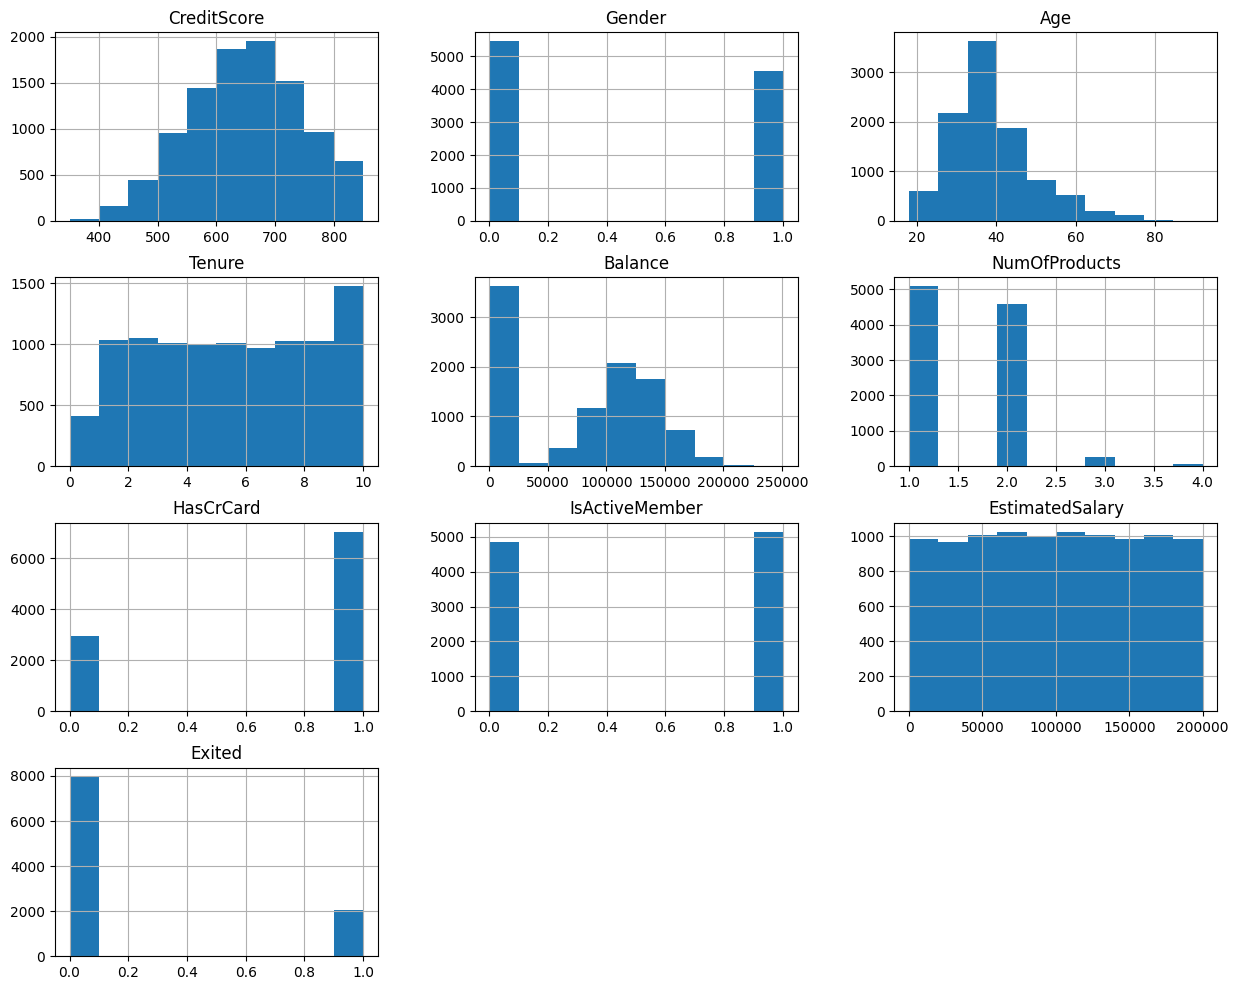

In [67]:
df_encoded.hist(figsize=(15,12))
plt.title('Features Distribution')
plt.show

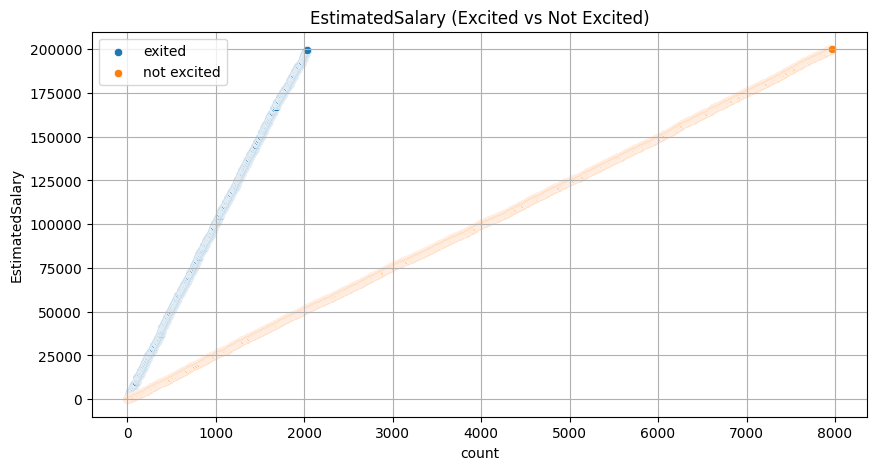

In [69]:
plt.figure(figsize=(10,5))
yEstimatedSalary=list(y['EstimatedSalary'])
sEstimatedSalary=list(x["EstimatedSalary"])

yEstimatedSalary.sort()
sEstimatedSalary.sort()

sns.scatterplot(yEstimatedSalary,label="exited")
sns.scatterplot(sEstimatedSalary,label="not excited")
plt.grid()
plt.title("EstimatedSalary (Excited vs Not Excited)")
plt.ylabel("EstimatedSalary")
plt.xlabel("count")
plt.show()

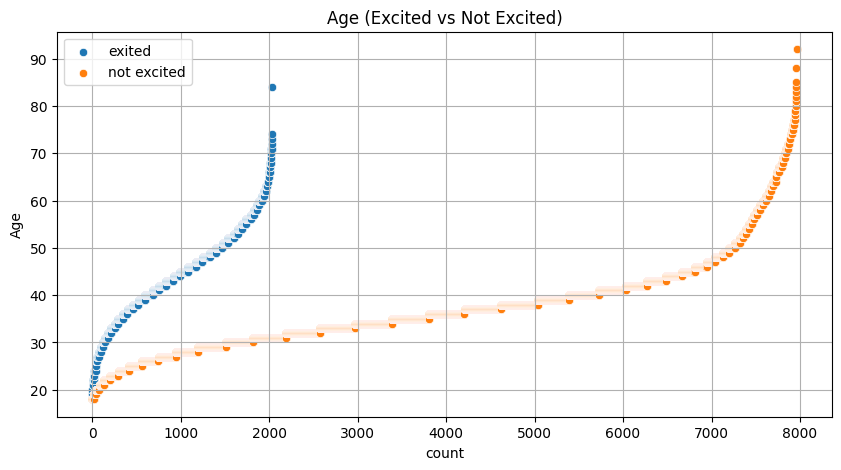

In [71]:
plt.figure(figsize=(10,5))
yage=list(y['Age'])
sage=list(x["Age"])

yage.sort()
sage.sort()

sns.scatterplot(yage,label="exited")
sns.scatterplot(sage,label="not excited")
plt.grid()
plt.title("Age (Excited vs Not Excited)")
plt.ylabel("Age")
plt.xlabel("count")
plt.show()

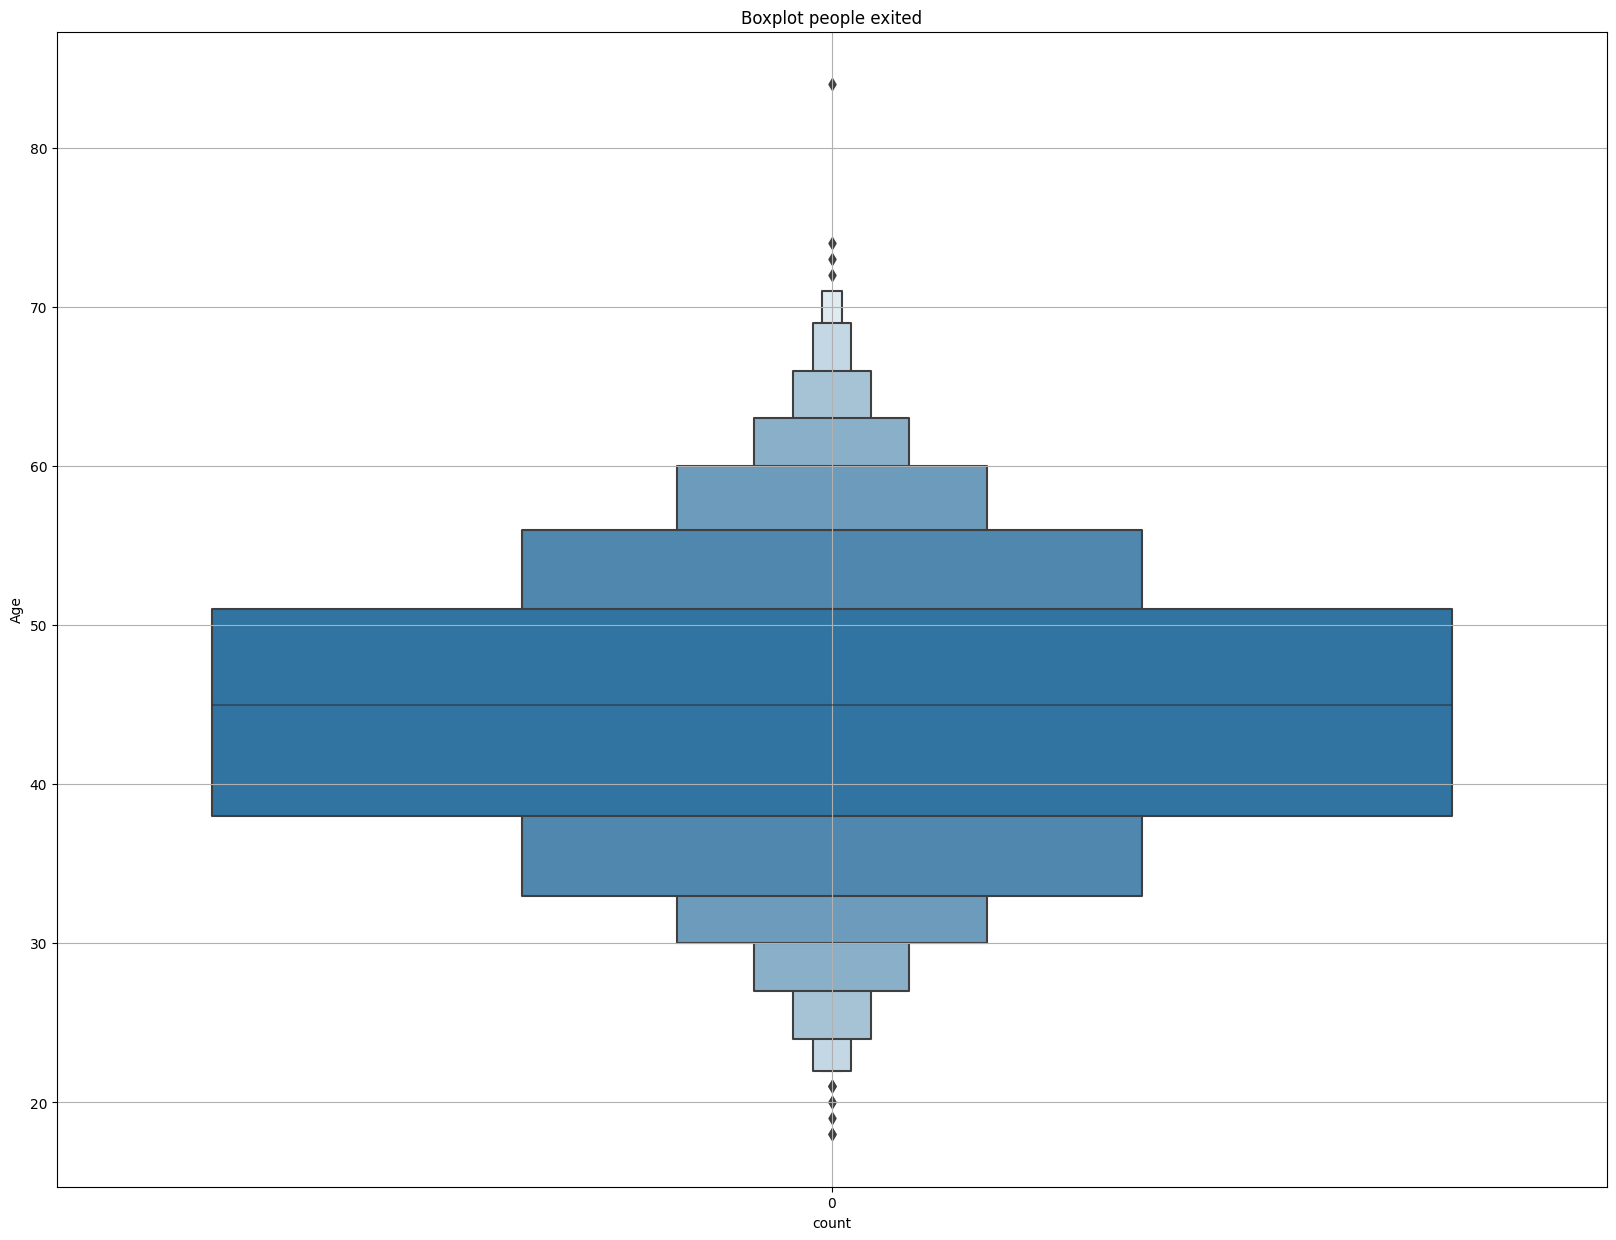

In [72]:
plt.figure(figsize=(20,15))
sns.boxenplot(y["Age"])
plt.grid()
plt.title("Boxplot people exited")
plt.ylabel("Age")
plt.xlabel("count")
plt.show()

In [74]:
gender = y['Gender'].value_counts()
value=list(y['Gender'].value_counts())
r=['female','male']
print(r)

['female', 'male']


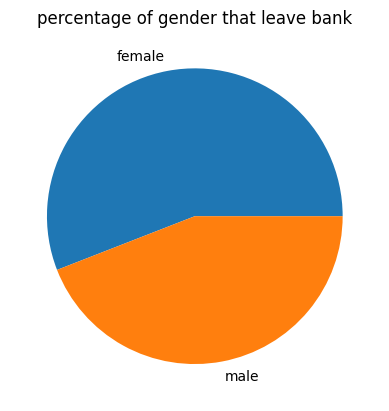

In [75]:
plt.pie(value,labels=r)
plt.title("percentage of gender that leave bank")
plt.show()

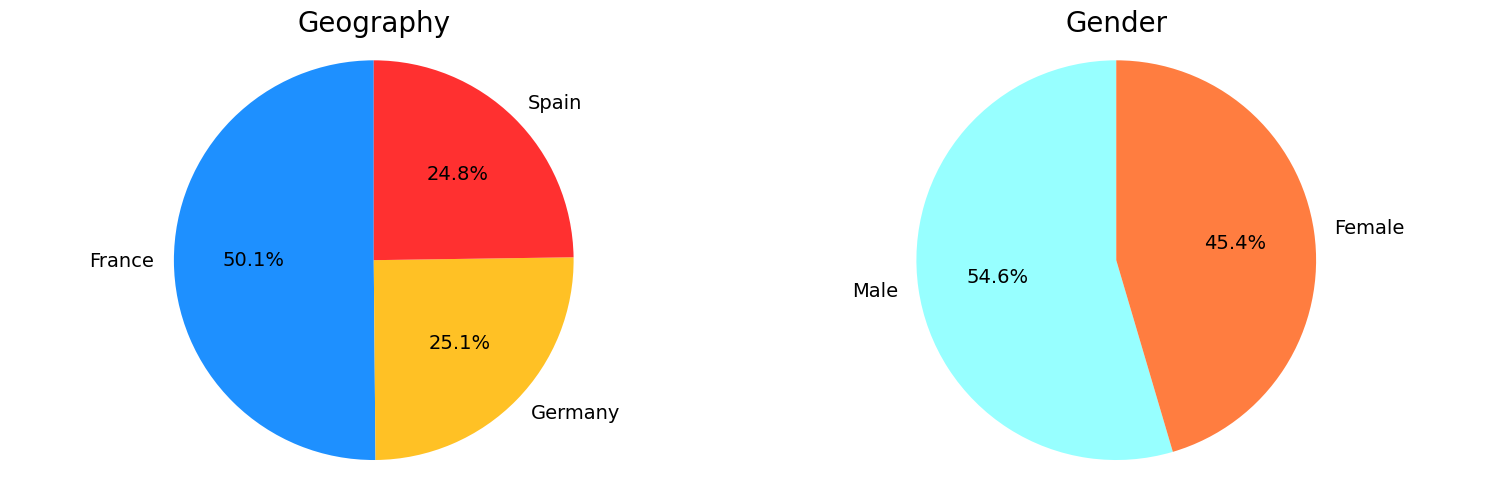

In [78]:
fig ,axes = plt.subplots(1,2, figsize=(15,5))

for i, col in enumerate(['Geography', 'Gender']):
    labels = df[col].value_counts().index.tolist()
    sizes = df[col].value_counts().values
    if col == 'Geography':
        colors = ['#1E90FF', '#FFC125', '#FF3030']
    else:
        colors = ['#97FFFF', '#FF7D40']

    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 14}, 
                colors=colors)
    axes[i].axis('equal')
    axes[i].set_title(f'{col}', fontsize = 20)

plt.tight_layout()
plt.show()

<Axes: xlabel='CreditScore', ylabel='Density'>

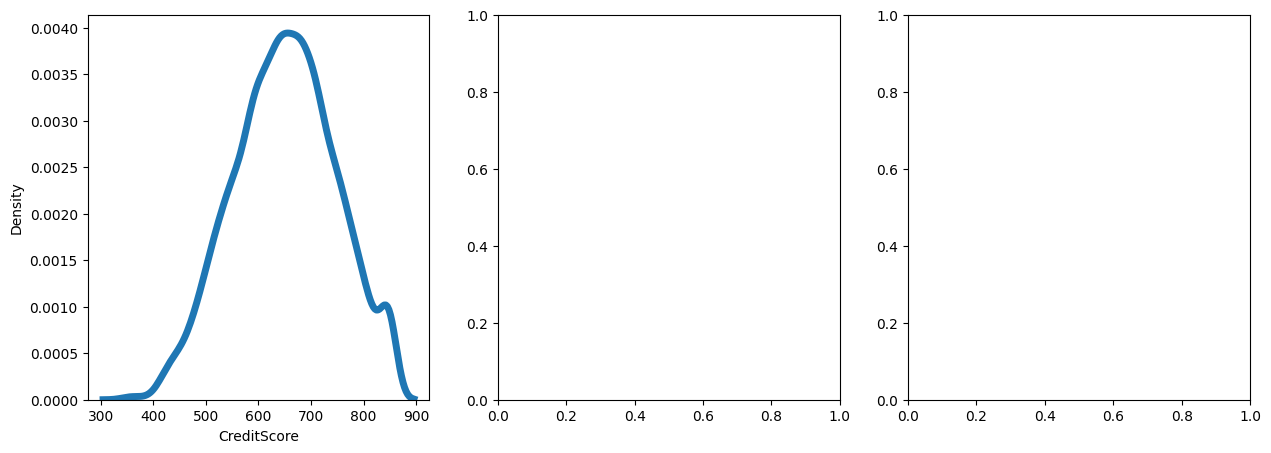

In [83]:
pal2 = sns.color_palette("hls", 2)
pal3 = sns.color_palette("husl", 3)
fig ,axes = plt.subplots(1,3, figsize=(15,5))
sns.kdeplot(df['CreditScore'], ax=axes[0], linewidth=5)


<Axes: xlabel='Age', ylabel='Count'>

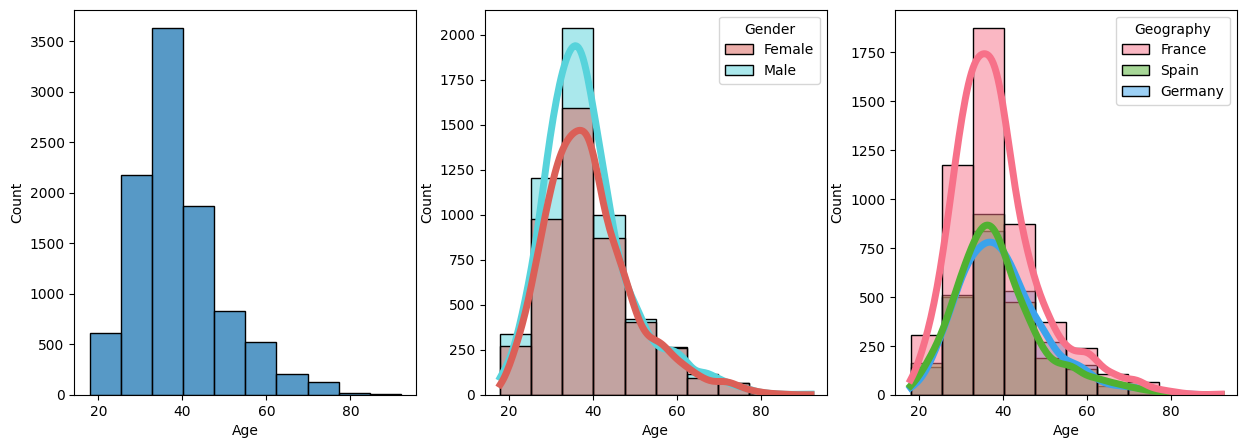

In [84]:
fig ,axes = plt.subplots(1,3, figsize=(15,5))
sns.histplot(df['Age'], ax=axes[0], bins=10, kde_kws={'lw':5})
sns.histplot(x='Age',data=df, hue='Gender', ax=axes[1], bins=10, kde=True, palette=pal2, line_kws={'lw':5})
sns.histplot(x='Age',data=df, hue='Geography', ax=axes[2], bins=10, kde=True, palette=pal3, line_kws={'lw':5})

<Axes: xlabel='Balance', ylabel='Geography'>

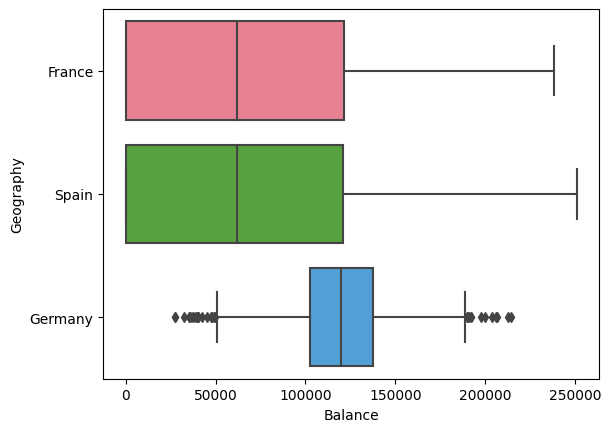

In [85]:
sns.boxplot(x="Balance", y="Geography", data=df, palette = pal3)

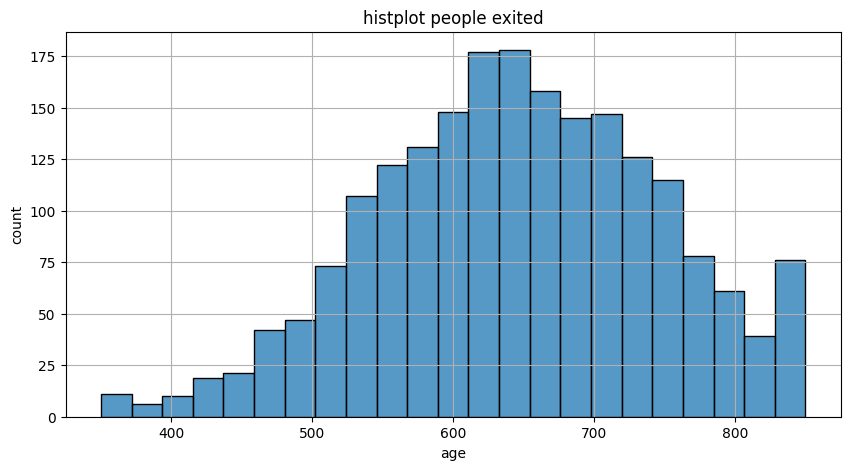

In [86]:
plt.figure(figsize=(10,5))
sns.histplot(y["CreditScore"])
plt.grid()
plt.title("histplot people exited")
plt.ylabel("count")
plt.xlabel("age")
plt.show()

In [90]:
from sklearn.preprocessing import LabelEncoder
m=LabelEncoder()
for i in df.columns:
    if df[i].dtype=="object":
        df[i]=m.fit_transform(df[i])

In [91]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df.tail(),df.info(),df.describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


(      CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 9995          771          0       1   39       5       0.00              2   
 9996          516          0       1   35      10   57369.61              1   
 9997          709          0       0   36       7       0.00              1   
 9998          772          1       1   42       3   75075.31              2   
 9999          792          0       0   28       4  130142.79              1   
 
       HasCrCard  IsActiveMember  EstimatedSalary  Exited  
 9995          1               0         96270.64       0  
 9996          1               1        101699.77       0  
 9997          0               1         42085.58       1  
 9998          1               0         92888.52       1  
 9999          1               0         38190.78       0  ,
 None,
 <bound method NDFrame.describe of       CreditScore  Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0             619          0       

In [93]:
from sklearn.model_selection import train_test_split
x=df.drop("Exited",axis=1)
y=df['Exited']

In [94]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 1,test_size = 0.3)

In [96]:
from sklearn.preprocessing import StandardScaler

m=StandardScaler()

x_train =pd.DataFrame(m.fit_transform(x_train),columns = x_train.columns)
x_test = pd.DataFrame(m.fit_transform(x_test),columns = x_test.columns)

In [97]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train,y_train)

LogisticRegression()

In [98]:
y_pred = classifier.predict(x_test)

In [99]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2305   68]
 [ 506  121]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression')

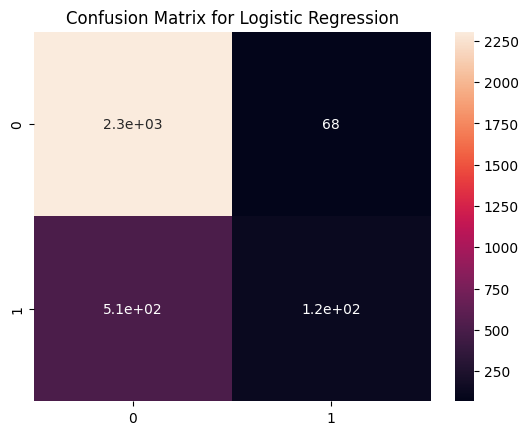

In [101]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for Logistic Regression")

In [102]:
lr = accuracy_score(y_test,y_pred)
lr

0.8086666666666666

In [103]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
svc = SVC(random_state = 101)
svc.fit(x_train,y_train)

SVC(random_state=101)

In [104]:
svc.score(x_test,y_test)

0.8556666666666667

In [105]:
y_pred = svc.predict(x_test)

In [107]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2322   51]
 [ 382  245]]


Text(0.5, 1.0, 'Confusion Matrix for Support Vector Machine ')

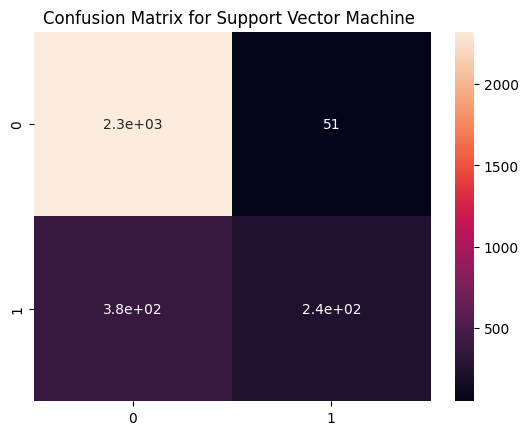

In [108]:
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix for Support Vector Machine ")

<function matplotlib.pyplot.show(close=None, block=None)>

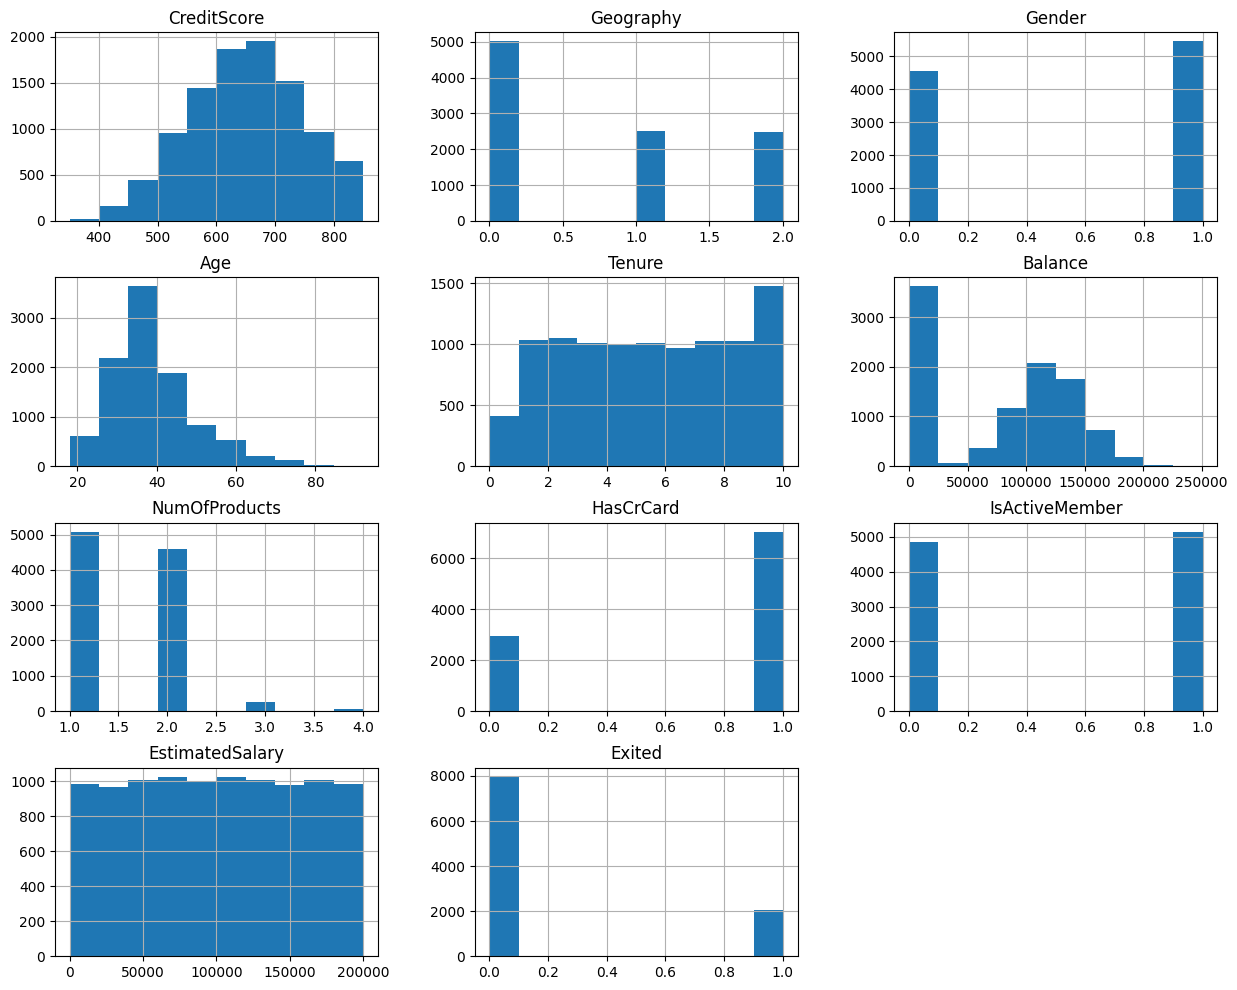

In [112]:
df.hist(figsize=(15,12))
plt.title('Features Distribution')
plt.show